# CAS Data Science - Frequent Itemsets

### A.Csillaghy, CAS Data Science FS 2020

In dieser Übung programmieren Sie einen Algorithmus, um häufige Objektmengen zu finden. 

Der einzige Eingabe-Parameter des Algorithmus ist das Minimum Support minsup, das die Schwelle bestimmt, ab welche Häufigkeit eine Objektmenge häufig ist. 

Zuerst importieren wir einige Bibliotheken: 

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from collections import defaultdict
import glob, os
import math
import bisect
import unittest
from datetime import datetime
import pandas as pd
import re

Dann definieren wir einige Sachen, die Ihre Arbeit vereinfachen sollte: WordBasket und readQueries

* Die Klasse WordBasket hält einzelne Worte einer Internet-Suchabfrage als Liste und Set. 
* Mittels der Funktion containsAll kann geprüft werden, ob ein WordBasket ein Subset eines anderen WordBaskets ist. Die Klasse kann entweder mit einem Argument (eine Liste von Worten) oder mit zwei Argumenten (zwei WordBaskets, welche zu mergen sind) erstellt werden. <br>
* readQueries liest eine bestimmte Anzahl an Internet-Suchabfragen ein.

In [2]:
class WordBasket :
    """ Simple class which represents a word basket. """
    
    def __init__(self, _words, merge=None) :

        # init words
        self.words = []
        self.words_set = set()
        
        if merge is None:
            # init words
            self.words = _words
        else:
            # init word out of two WordBaskets
            self.words = _words.words + merge.words
            
        self.words_set = set(self.words)
            
    def containsAll(self, wordBasket):
        return wordBasket.words_set.issubset(self.words_set)
        
        
def readQueries (limit, listoflist=False ) :
    """ Function which reads the queries and returns a list of wordbaskets """ 

    i = 0
    queries = []
    
    # read file and create a wordbasket for each query
    with open("queries.txt") as f:
        for line in f:
            # check if limit is reached
            if i == limit: break
            i+=1
            
            # split the query to a list of words
            if listoflist == False: 
                line = line.rstrip()
                tmp = line.split(" ")
                queries.append(WordBasket(tmp))
            else:
                queries.append( re.sub("[^\w]", " ", line ).split() )
            
    # return a list of word baskets
    return queries

Es werden 100 Queries eingelesen und in userem oben definierten WordBasket gespeichert.  
Die ersten 5 werden angezeigt:

In [3]:
queries = readQueries(10)
for i in range(6):
   print(queries[i].words)

['verizon', 'wireless']
['zip', 'codes']
['baby', 'center']
['people', 'search']
['national', 'car', 'rental']
['home', 'depot']


In [4]:
queries

Programmieren Sie die Funktion doFrequentItemsetsAnalysis.Sie soll alle Frequent Item Sets der Länge 1 bis maxItemsetSize, welche genügend Support (minSupport) haben, berechnen.

Hinweis für die Entwicklung: A-Priori Algorithm

Empfohlene Vorgehen Breath-First-Search:

- Bauen Sie zuerst einen Dictionary mit allen Wörtern und ihrem Vorkommen (allWords) auf;
- Dann identifizieren Sie die Single Items mit support > minsup;
- Dann berechnen Sie nun die weiteren Multi Frequent Item Sets.

Beachten Sie folgendes:

- Sie können die jeweilige frequentItemSet (z.B. für 2 und 3 Einträge) in einer Liste, z.B. frequentItemSets, speichern
- Schauen Sie, dass sie keine Duplikate speichern (Bsp: ['vox', 'news'] und ['news','vox'])
- Nutzen Sie die containsAll Funktion der WordBaskets, um zu prüfen, ob es sich um ein Subset handelt.
- Nutzen Sie die asserts weiter unten, um die Korrektheit ihrer Lösung zu prüfen.



In [5]:
def doFrequentItemsetsAnalysis ( queries, maxItemsetSize=3,minSupport=0.0018, debug=0) :

    """ This function generates FrequentItemsets.  
    
        Arguments:
        queries: The list of queries done by users
        maxItemsetSize: The number of words per basked the caller is interested in
        minSupport: the minimal support 
        debug: prints messages
        
        Returns:
        frequentItemSets: A list of FrequentItemSets, one for each ItemSize (maxItemsetSize) """
        
#---

    if debug > 1: print( "Associate each word with its counter...")

    ### BEGIN SOLUTION

  
        
    ### END SOLUTION
    
    return frequentItemSets

In [6]:
# run doFrequentItemsetsAnalysis in debug mode
frequentItemSets = doFrequentItemsetsAnalysis(queries,minSupport=0.05,debug=1)
for words in frequentItemSets[0].keys():
    print(words.words)
#print( frequentItemSets[0].keys() )

Total number of words: 20
Number of SingleItemSets: 20
['verizon']
['wireless']
['zip']
['codes']
['baby']
['center']
['people']
['search']
['national']
['car']
['rental']
['home']
['depot']
['georgia']
['state']
['university']
['best']
['buy']
['disney']
['world']


Nachfolgend werden 5 Instanzen mit unterschiedlichen Grössen ausgeführt (Dauert ca. 5min). Sehen Sie sich das entstehende Diagramm an und notieren Sie die Komplexität ihrer Implementation. Stimmt dies mit dem Diagramm überein?

Text(0, 0.5, 'seconds')

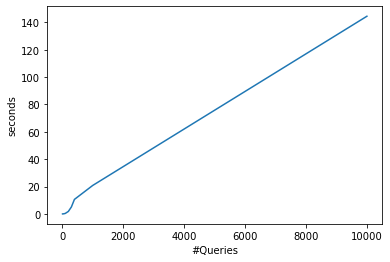

In [7]:
test_cases=[10,50,100,200,300,400,1000,10000]
test_results=[0,0,0,0,0,0,0,0]

for x in range(len(test_cases)):
    time1 = datetime.now()
    queries = readQueries(test_cases[x])
    frequentItemSets = doFrequentItemsetsAnalysis(queries)
    time2 = datetime.now()
    time_diff = time2 - time1
    test_results[x]=time_diff.total_seconds()

plt.figure()
plt.plot(test_cases,test_results)
plt.xlabel(u"#Queries")
plt.ylabel("seconds")

Text(0, 0.5, 'seconds')

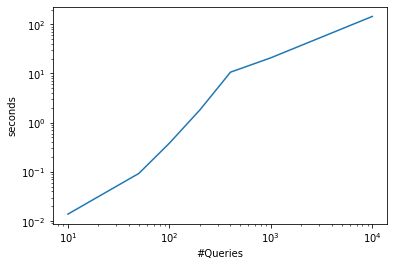

In [8]:
axes = plt.gca() # get current axes
axes.set_yscale("log")
axes.set_xscale("log")
plt.plot(test_cases,test_results)
plt.xlabel(u"#Queries")
plt.ylabel("seconds")

In [9]:
# This library is useful for mining 
import mlxtend

In [10]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [11]:
queries = readQueries(100, listoflist=True)
for i in range(6):
       print(queries[i])

['verizon', 'wireless']
['zip', 'codes']
['baby', 'center']
['people', 'search']
['national', 'car', 'rental']
['home', 'depot']


In [12]:
len(queries)

100

In [13]:
te = TransactionEncoder()
te_ary = te.fit(queries).transform(queries)
df_ary = pd.DataFrame(te_ary, columns=te.columns_)

In [14]:
df_ary

,american,aol,are,area,at,baby,bay,beach,best,birthday,...,west,western,when,white,wireless,work,world,yellow,you,zip
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
frequent_itemsets = apriori(df_ary, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Nur die 'support', 'confidence', 'lift' Spalten anzeigen
result = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
result.sort_values('confidence', ascending=False)

# alles anzeigen
# rules.sort_values('confidence', ascending=False)

,antecedents,consequents,support,confidence,lift
0,(idol),(american),0.02,1.000000,50.000000
809,"(on, at)","(jobs, work)",0.01,1.000000,100.000000
818,"(line, work, at)",(on),0.01,1.000000,100.000000
817,"(on, line, work)",(at),0.01,1.000000,50.000000
816,"(on, line, at)",(work),0.01,1.000000,25.000000
...,...,...,...,...,...
536,(home),"(jobs, work)",0.01,0.125000,12.500000
744,(home),"(on, line, at)",0.01,0.125000,12.500000
927,(home),"(jobs, on, line)",0.01,0.125000,12.500000
771,(home),"(on, at, work)",0.01,0.125000,12.500000


In [16]:
frequent_itemsets

,support,itemsets
0,0.02,(american)
1,0.08,(aol)
2,0.02,(are)
3,0.01,(area)
4,0.02,(at)
...,...,...
340,0.01,"(on, at, home, line, work)"
341,0.01,"(jobs, on, at, line, work)"
342,0.01,"(post, county, beach, palm, times)"
343,0.01,"(jobs, on, home, line, work)"
